<a href="https://colab.research.google.com/github/Sriharish19/SH_Zomato-Restaurant-Clustering-and-Sentiment-Analysis/blob/main/SH_Zomato_Restaurant_Clustering_and_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants, and also has food delivery options from partner restaurants in select cities.

India is quite famous for its diverse multi cuisine available in a large number of restaurants and hotel resorts, which is reminiscent of unity in diversity. Restaurant business in India is always evolving. More Indians are warming up to the idea of eating restaurant food whether by dining outside or getting food delivered. The growing number of restaurants in every state of India has been a motivation to inspect the data to get some insights, interesting facts and figures about the Indian food industry in each city. So, this project focuses on analysing the Zomato restaurant data for each city in India.

The Project focuses on Customers and Company, you have  to analyze the sentiments of the reviews given by the customer in the data and made some useful conclusion in the form of Visualizations. Also, cluster the zomato restaurants into different segments. The data is vizualized as it becomes easy to analyse data at instant. The Analysis also solve some of the business cases that can directly help the customers finding the Best restaurant in their locality and for the company to grow up and work on the fields they are currently lagging in.

This could help in clustering the restaurants into segments. Also the data has valuable information around cuisine and costing which can be used in cost vs. benefit analysis

Data could be used for sentiment analysis. Also the metadata of reviewers can be used for identifying the critics in the industry. 

# **Attribute Information**

## **Zomato Restaurant names and Metadata**
Use this dataset for clustering part

1. Name : Name of Restaurants

2. Links : URL Links of Restaurants

3. Cost : Per person estimated Cost of dining

4. Collection : Tagging of Restaurants w.r.t. Zomato categories

5. Cuisines : Cuisines served by Restaurants

6. Timings : Restaurant Timings

## **Zomato Restaurant reviews**
Merge this dataset with Names and Matadata and then use for sentiment analysis part

1. Restaurant : Name of the Restaurant

2. Reviewer : Name of the Reviewer

3. Review : Review Text

4. Rating : Rating Provided by Reviewer

5. MetaData : Reviewer Metadata - No. of Reviews and followers

6. Time: Date and Time of Review

7. Pictures : No. of pictures posted with review

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import math
import warnings
warnings.filterwarnings('ignore')

import re, string, unicodedata
import nltk
import inflect
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer

from keras.preprocessing.text import Tokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from nltk.stem import PorterStemmer, LancasterStemmer

from yellowbrick.cluster import KElbowVisualizer
from wordcloud import WordCloud

import inflect
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from wordcloud import WordCloud, STOPWORDS

from sklearn.cluster import DBSCAN
from textblob import TextBlob

from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
nltk.download('vader_lexicon')
import plotly.express as px

from collections import Counter

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [2]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/Mydrive')

Mounted at /content/Mydrive


In [3]:
# Loading the CSV file
df = pd.read_csv('/content/Mydrive/MyDrive/Capstone-5 Zomato/Copy of Zomato Restaurant names and Metadata.csv')

In [4]:
# Shape
df.shape

(105, 6)

In [5]:
# Head
df.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [6]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [7]:
# Null values
# Percentage of null values for each features
# print(list(df.columns))

for col in list(df.columns):
  if ((df[col].isnull().sum())/(len(df[col]))*100) > 50:
    # print((df[col].isnull().sum())/(len(df[col]))*100)
    print('Feature with more than 50% of the observations are NULL values:',col)

# As in the feature 'Collections' more than 50% of the observations are NULL values, so feature 'Collections' is droppped

Feature with more than 50% of the observations are NULL values: Collections


In [8]:
# Dropping the 'Collections' feature
df.drop(columns = 'Collections',axis =1,inplace = True)

# Removing the observations with null values in 'Timings' feature
df.dropna(axis = 0,inplace = True)

# Print
print('Shape:',df.shape)
print(df.info())

Shape: (104, 5)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 104 entries, 0 to 104
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      104 non-null    object
 1   Links     104 non-null    object
 2   Cost      104 non-null    object
 3   Cuisines  104 non-null    object
 4   Timings   104 non-null    object
dtypes: object(5)
memory usage: 4.9+ KB
None


In [9]:
# Summary
df.describe()

,Name,Links,Cost,Cuisines,Timings
count,104,104,104,104,104
unique,104,104,29,91,77
top,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,500,"North Indian, Chinese",11 AM to 11 PM
freq,1,1,13,4,6


In [10]:
# Replacing empty space and comma in 'Cuisine' feature
df['Cuisines'] = df['Cuisines'].str.replace(' ','')
df['Cuisines'] = df['Cuisines'].str.replace(',',', ')

In [11]:
# Unique set of Cuisines
print('Number of Unique set of Cuisines : ',len(df['Cuisines'].unique()))
print(list(df['Cuisines'].unique()))

Number of Unique set of Cuisines :  91
['Chinese, Continental, Kebab, European, SouthIndian, NorthIndian', 'Biryani, NorthIndian, Chinese', 'Asian, Mediterranean, NorthIndian, Desserts', 'Biryani, NorthIndian, Chinese, Seafood, Beverages', 'Asian, Continental, NorthIndian, Chinese, Mediterranean', 'Seafood, Goan, NorthIndian, Continental, Asian', 'HealthyFood, NorthIndian, Continental, SouthIndian', 'Lebanese', 'American, Chinese, NorthIndian, Kebab, SouthIndian', 'IceCream, Desserts', 'StreetFood, NorthIndian, FastFood', 'Mediterranean, NorthIndian, Kebab, BBQ', 'Continental, American, Chinese', 'NorthIndian, Italian, FingerFood', 'European, Mediterranean, NorthIndian', 'Burger, FastFood', 'NorthIndian', 'Chinese, NorthIndian', 'NorthIndian, Chinese, Continental', 'NorthIndian, Chinese, Biryani', 'NorthIndian, Japanese, Italian, Salad, Sushi', 'American', 'Continental', 'Mexican, Italian, NorthIndian, Chinese, Salad', 'NorthIndian, Mediterranean, European', 'Mughlai, Biryani', 'FastFo

In [12]:
# Spliiting with 'comma' and empty space
cuisine_list = df.Cuisines.str.split(', ')
# print(cuisine_list)

In [13]:
# Top 10 Cuisines
clusterlist = {}
for names in cuisine_list:
    for name in names:
      # print(name)
      if (name in clusterlist):
        clusterlist[name]+=1
        # print(clusterlist)
      else:
         clusterlist[name]=1
# Create a cuis dataframe
cuis_df = pd.DataFrame(clusterlist.values(),index = clusterlist.keys(),columns = {'Cuisine count in Restaurants'}).reset_index()

# Sort the dataframe in descending order
cuis_df.sort_values(by = 'Cuisine count in Restaurants',ascending = False,inplace = True)

#Pick the 10 restaurant most nominated 
top_10_cuis = cuis_df[0:10]

print('The Top 10 Cuisines are:\n',top_10_cuis)

The Top 10 Cuisines are:
           index  Cuisine count in Restaurants
5   NorthIndian                            60
0       Chinese                            43
1   Continental                            21
6       Biryani                            16
18     FastFood                            15
7         Asian                            15
20      Italian                            14
9      Desserts                            13
4   SouthIndian                             8
28       Bakery                             7


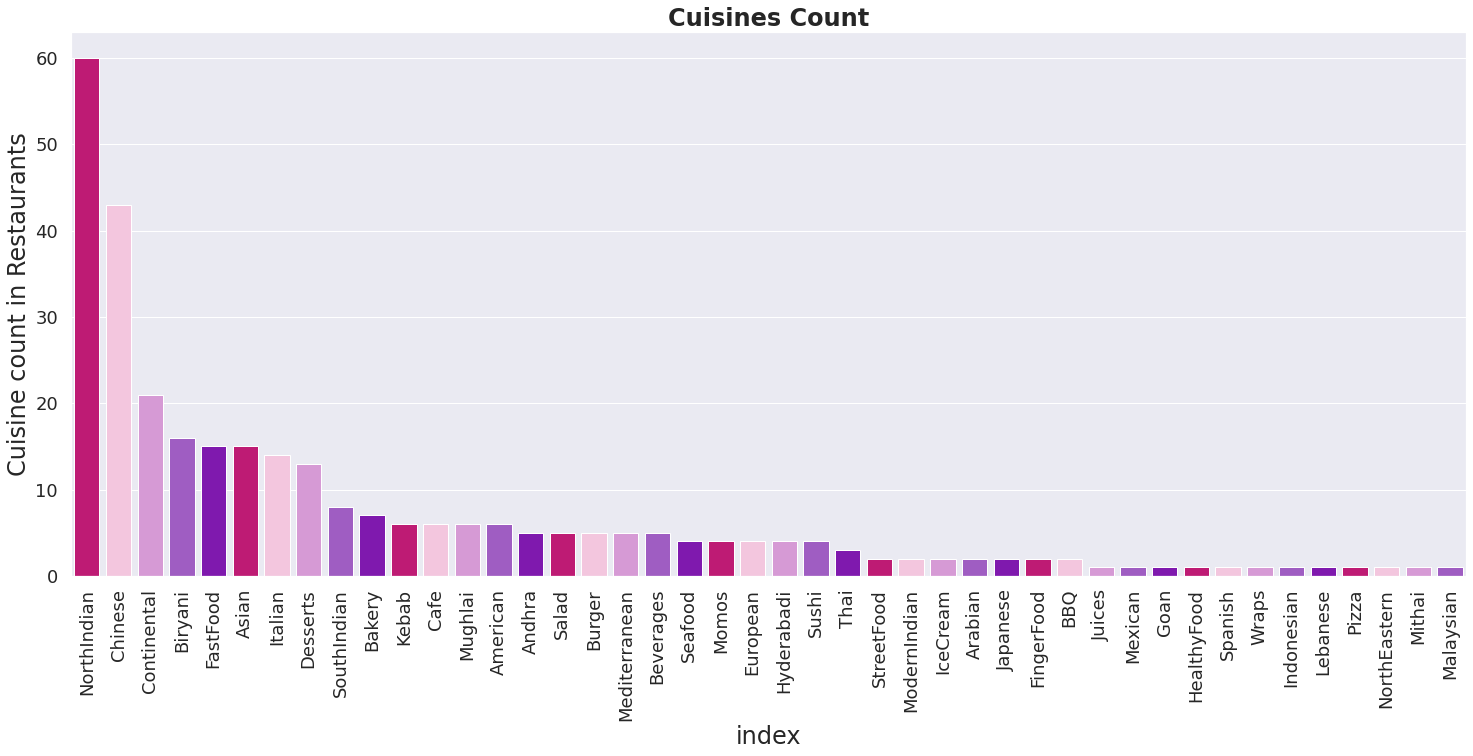

In [14]:
# Visualization of Cuisines Count
plt.figure(figsize = (25, 10))
sns.set(font_scale = 2)
sns.barplot(data = cuis_df,x = cuis_df['index'],y = cuis_df['Cuisine count in Restaurants'],palette=['#D90077','#FBBEDE','#E090DF','#A44CD3','#8800C7'])
plt.title('Cuisines Count',fontweight='bold')
plt.xticks(rotation = 90,fontsize = 18)
plt.yticks(fontsize = 18)
plt.show()

In [15]:
# df.head()

chinese, continental, kebab, european, southindian, northindian,biryani, northindian, chines,asian, mediterranean, northindian, dessert,biryani, northindian, chinese, seafood, beverag,asian, continental, northindian, chinese, mediterranean,seafood, goan, northindian, continental, asian,healthyfood, northindian, continental, southindian,lebanes,american, chinese, northindian, kebab, southindian,icecream, dessert,streetfood, northindian, fastfood,mediterranean, northindian, kebab, bbq,continental, american, chines,northindian, italian, fingerfood,european, mediterranean, northindian,burger, fastfood,northindian,chinese, northindian,northindian, chinese, continent,northindian, chinese, biryani,northindian,northindian, japanese, italian, salad, sushi,american,icecream, dessert,northindian, chinese, continent,continent,mexican, italian, northindian, chinese, salad,northindian, mediterranean, european,mughlai, biryani,fastfood,bakery, northindian, mughlai, juices, chines,arabian, northindian

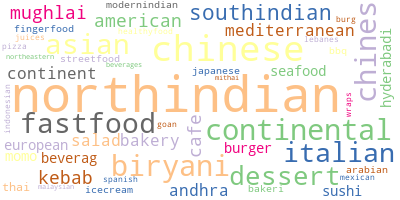

In [16]:
# Visualization of words from 'Cuisines' feature
df['Cuisines']= df['Cuisines'].astype(str)

ps = PorterStemmer() 
df['Cuisines']=df['Cuisines'].map(lambda x: ps.stem(x))
long_string = ','.join(list(df['Cuisines'].values))
print(long_string)
wordcloud = WordCloud(background_color="white", max_words=100, contour_width=13,colormap = 'Accent')
wordcloud.generate(long_string)
wordcloud.to_image()

In [17]:
# df.head()

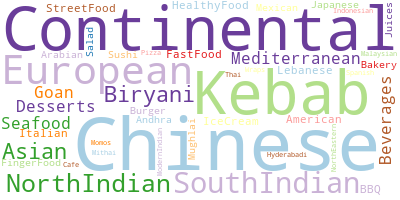

In [18]:
# Most nominated words from 'Cuisine' feature
words_list = clusterlist.keys()
strr = ' '
for i in words_list:
    strr=strr+i+' '
    
wordcloud = WordCloud(background_color='white',min_font_size = 1,colormap = 'Paired').generate(strr) 
wordcloud.to_image()


In [19]:
# Number of Unique Restaurant
print('Number of Unique Restaurants:',df['Name'].nunique())

Number of Unique Restaurants: 104


In [20]:
# 'Cuisine' feature
# Replacing ',' 
df['Cost'] = df['Cost'].str.replace(',','')

# Converting 'cost' feature to integer datatype
df['Cost'] = df['Cost'].apply(lambda x:int(x))

In [21]:
# Creating DataFrame with Restaurant names and their respective cost
restaurant_cost = pd.DataFrame(df.groupby('Name').agg({'Cost':'mean'})).reset_index()
restaurant_cost.sort_values(by = 'Cost',ascending = False,inplace= True)
# restaurant_cost.head()

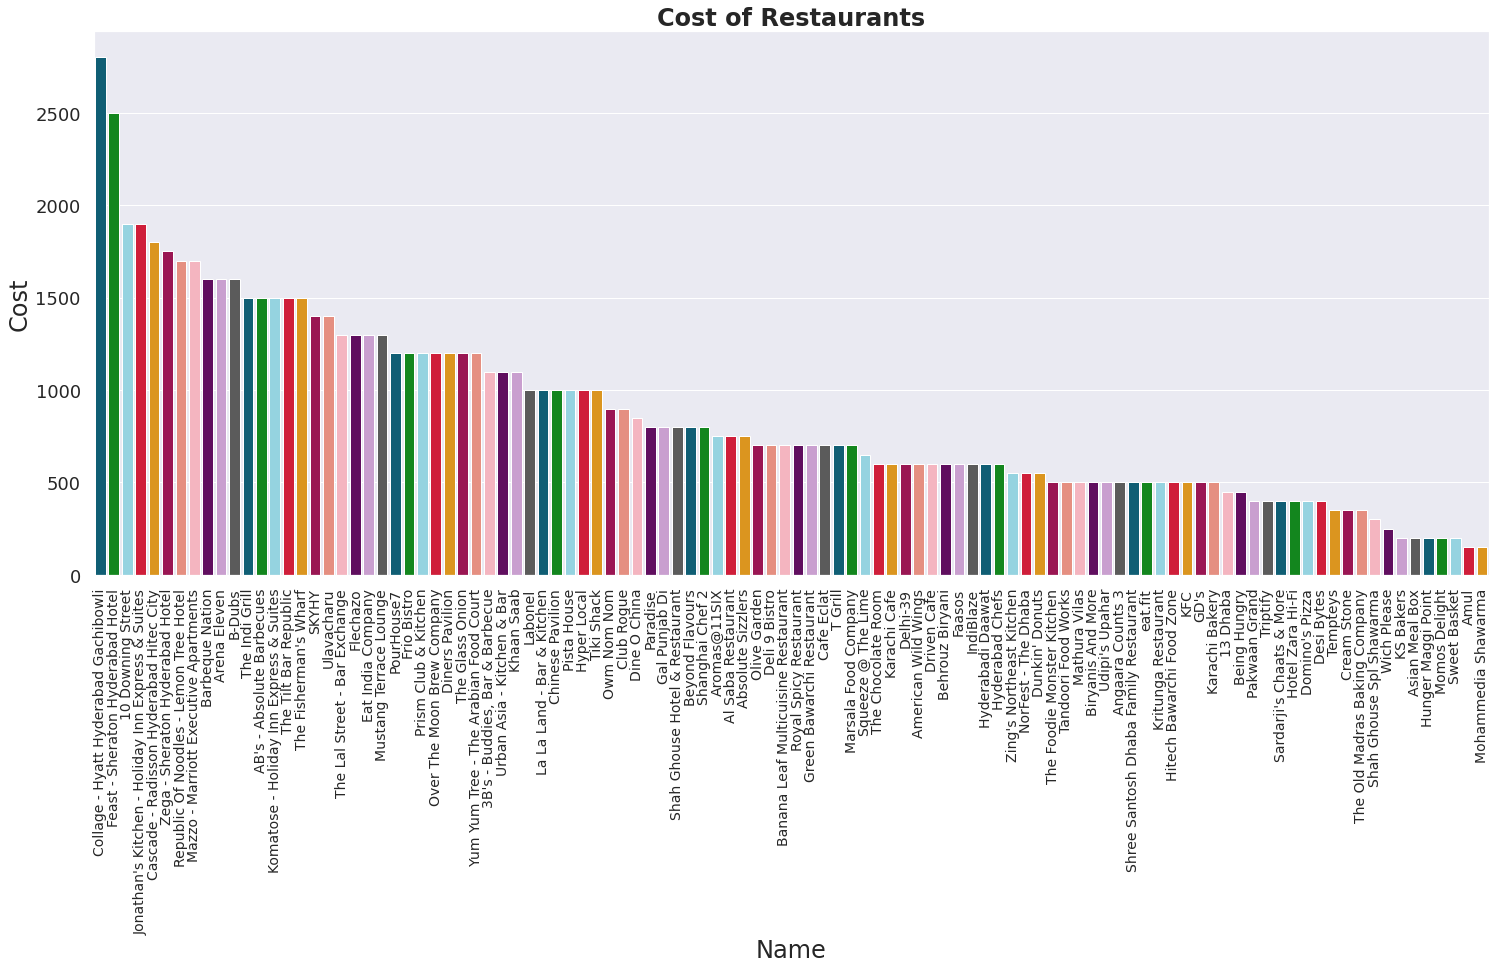

In [22]:
# Visualization of Restaurant names and their respective cost
plt.figure(figsize = (25, 10))
sns.set(font_scale = 2)
sns.barplot(data = restaurant_cost,x = restaurant_cost['Name'],y = restaurant_cost['Cost'],palette=['#006884','#00990E','#89DBEC','#ED0026','#FA9D00','#B00051','#F68370','#FEABB9','#6E006C','#CF97D7','#5B5B5B'])
plt.title('Cost of Restaurants',fontweight='bold')
plt.xticks(rotation = 90,fontsize = 14)
plt.yticks(fontsize = 18)
plt.show()

In [23]:
# Tokenizer
tokenizer = Tokenizer(num_words="MAX_NB_WORDS")
tokenizer.fit_on_texts(df[['Cuisines','Links','Timings']])

Function for Text Preprocessing

In [24]:
# Functions
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def replace_numbers(words):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = LancasterStemmer()
    stems = []
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)
    return stems

def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = replace_numbers(words)
    return words

# Applying functions
col_lsts = ['Links','Cuisines','Timings']
for col_lst in col_lsts:
  df[col_lst] = normalize(df[col_lst])

In [25]:
# Dataset after text preprocessing
df.head()

,Name,Links,Cost,Cuisines,Timings
0,Beyond Flavours,httpswwwzomatocomhyderabadbeyondflavoursgachib...,800,chinese continental kebab european southindian...,12noon to 330pm 630pm to 1130pm monsun
1,Paradise,httpswwwzomatocomhyderabadparadisegachibowli,800,biryani northindian chines,11 am to 11 pm
2,Flechazo,httpswwwzomatocomhyderabadflechazogachibowli,1300,asian mediterranean northindian dessert,1130 am to 430 pm 630 pm to 11 pm
3,Shah Ghouse Hotel & Restaurant,httpswwwzomatocomhyderabadshahghousehotelresta...,800,biryani northindian chinese seafood beverag,12 noon to 2 am
4,Over The Moon Brew Company,httpswwwzomatocomhyderabadoverthemoonbrewcompa...,1200,asian continental northindian chinese mediterr...,12noon to 11pm mon tue wed thu sun 12noon to 1...


**Preprocessing the dataset for Clustering models**

In [26]:
# Tfidf vectorizer
vectorizer = TfidfVectorizer(stop_words= 'english')
X = vectorizer.fit_transform(df['Cuisines'])

In [27]:
X.shape
# we have 50 unique words

(104, 50)

In [28]:
# Type of X object
type(X)

scipy.sparse.csr.csr_matrix

In [29]:
# Converting 'X' object to array
X = X.toarray()

In [30]:
type(X)

numpy.ndarray

**Elbow method to find appropriate 'K' value**

In [31]:
# 'k-means++' would initialize the centroids far from each other because intializing the centroids nearby could lead to improper clustering

In [32]:
# Function to find appropriate 'K' value
def KElbowvisualizer(metric):
  model = KMeans(init="k-means++",max_iter=300,random_state=0)
  plt.figure(figsize=(10,5))
  sns.set(font_scale = 1)
  visualizer = KElbowVisualizer(model, k=(2,20),metric= metric, timings= False, locate_elbow= True)
  # plt.title(fontweight='bold')
  # # Fit the data to the visualize
  visualizer.fit(X)  
  visualizer.poof()

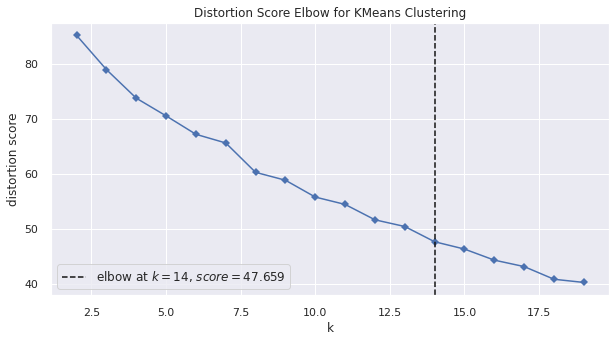

In [33]:
# KElbowvisualizer with metric as 'distortion
KElbowvisualizer('distortion')

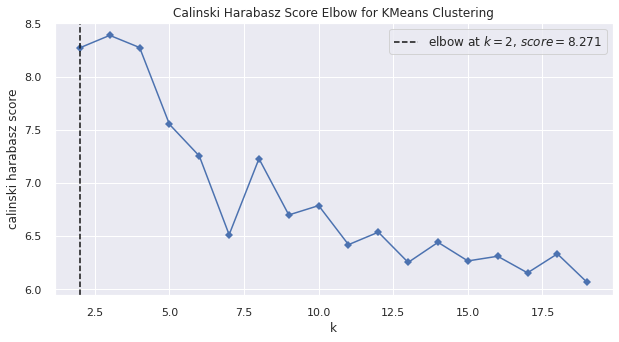

In [34]:
# KElbowvisualizer with metric as 'calinski_harabasz'
KElbowvisualizer('calinski_harabasz')

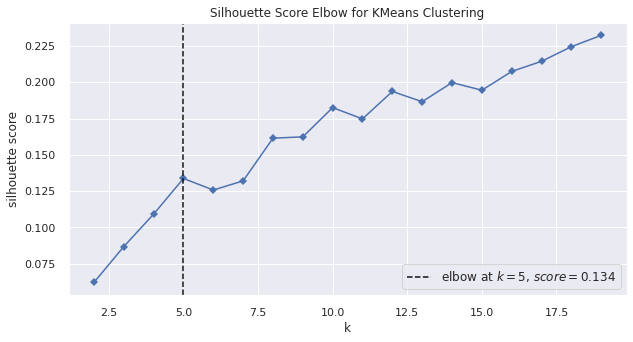

In [35]:
# KElbowvisualizer with metric as 'silhouette'
KElbowvisualizer('silhouette')

Appropriate **K** value was found to be **14** 

**K Means Clustering**

In [36]:
# looks like we can go with 14 clusters.
# Creating an object for K Means clustering
kmeans= KMeans(n_clusters=14, init= 'k-means++',max_iter=300, n_init=1,random_state = 0)

In [37]:
# MOdel fit
kmeans.fit(X)

KMeans(n_clusters=14, n_init=1, random_state=0)

In [38]:
#predict the labels of clusters.
labels = kmeans.fit_predict(X)

In [39]:
# Clusters center
clusters_center = kmeans.cluster_centers_

In [40]:
# Testin

X_new= vectorizer.transform([df['Cuisines'][15]])

y_pred_new= kmeans.predict(X_new)[0]

y_pred_new

2

In [41]:
# Silhouette score is for model validation for K-means,Hierarichical clustering.
# Silhouette Coefficient ranges between -1 to +1.
# Higher the Silhouette Coefficient better the clustering.

**Model Validation**

In [42]:
# Model Validation
# silhouette score of my clusters
print("Silhouette Coefficient: %0.3f"%silhouette_score(X, kmeans.labels_))

Silhouette Coefficient: 0.179


For n_clusters = 10 The average silhouette_score is : 0.1825
For n_clusters = 11 The average silhouette_score is : 0.1747
For n_clusters = 12 The average silhouette_score is : 0.1937
For n_clusters = 13 The average silhouette_score is : 0.1866
For n_clusters = 14 The average silhouette_score is : 0.1998
For n_clusters = 15 The average silhouette_score is : 0.1945


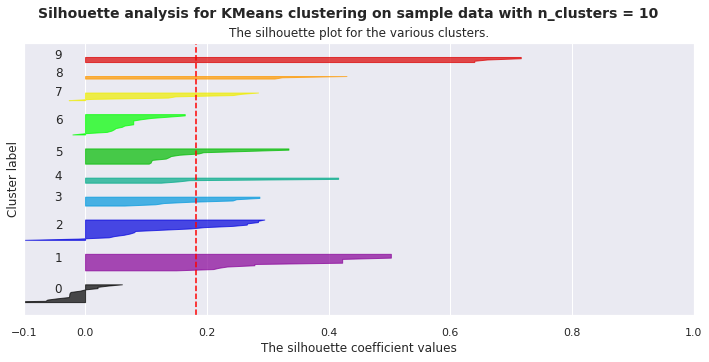

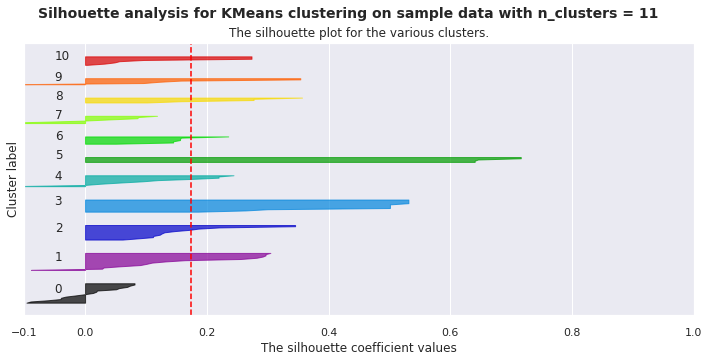

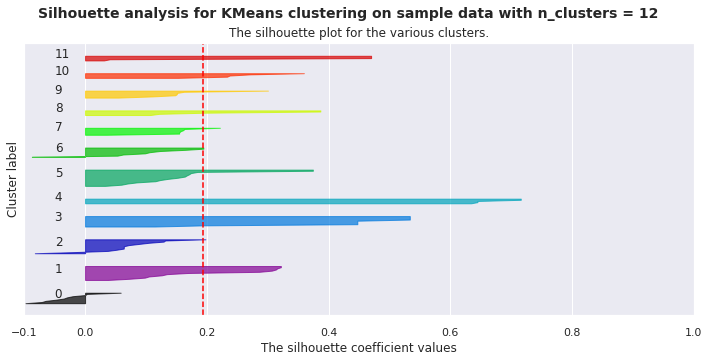

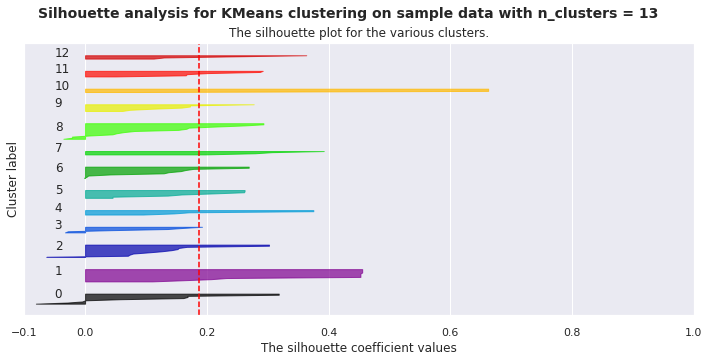

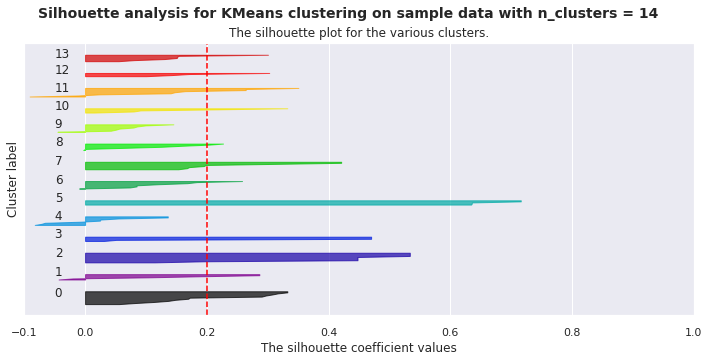

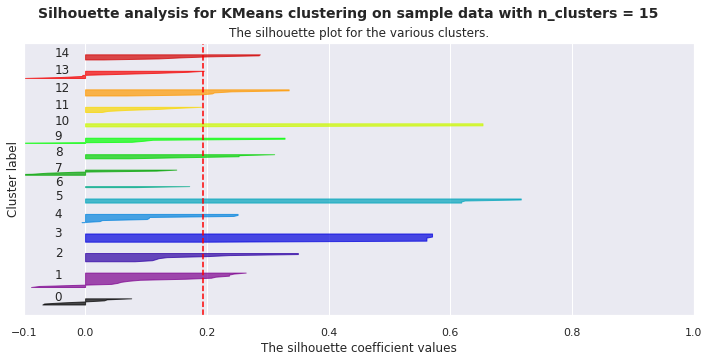

In [43]:
# Evaluation
range_n_clusters = [10, 11, 12, 13, 14, 15]
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots()
    fig.set_size_inches(12, 5)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters,init= 'k-means++',random_state=0)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    # print("For n_clusters =", n_clusters,
    #       "The average silhouette_score is :", round(silhouette_avg,4))

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", round(silhouette_avg,4))
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
plt.show()

In [44]:
# Creating new feature to store labels
df['Kmeans_labels'] = kmeans.labels_

In [45]:
# Creating a DataFrame for KMeans Labels visualization
Kmeans_labels_count = pd.DataFrame(df.groupby(['Kmeans_labels'])['Cuisines'].count()).reset_index()

In [46]:
# Function for Labels with n number of observations
def labelsnobs(dataframe,x_value,y_value,palette_type,title,y_label):
  plt.figure(figsize = (20, 8))
  sns.set(font_scale = 2)
  sns.barplot(data = dataframe,x = x_value,y = y_value,palette=palette_type)
  plt.title(title,fontweight='bold')
  plt.ylabel(y_label)
  plt.xticks(rotation = 90,fontsize = 14)
  plt.yticks(fontsize = 18)
  plt.show()

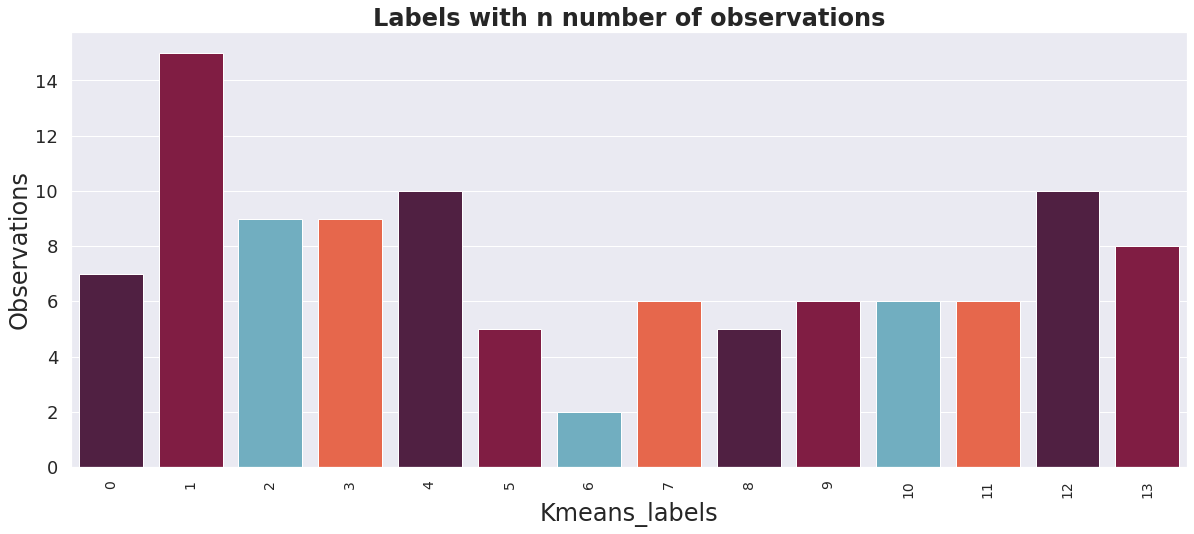

In [47]:
# Visualization of Labels with n number of observations
labelsnobs(Kmeans_labels_count,Kmeans_labels_count['Kmeans_labels'],Kmeans_labels_count['Cuisines'],['#581845','#900C3F','C70039','#FF5733'],'Labels with n number of observations','Observations')

In [48]:
# Getting terms
terms = vectorizer.get_feature_names()

In [49]:
# Top terms(words) in  per cluster set
print('\033[1m' + 'Top terms in each cluster:' + '\033[0m')
cuisines_list = []
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
for i in range(14):
  num = str(i)
  # print('\033[1m' + 'Cluster:' + '\033[0m',i, end='')
  print('\033[1m' + 'Cluster:' + num + '\033[0m', end='')
  for ind in order_centroids[i, :10]:
    cuisines_list.append(terms[ind])
  print(cuisines_list)
  cuisines_list = []

Top terms in each cluster:
Cluster:0['andhra', 'biryani', 'northindian', 'chines', 'lebanes', 'chinese', 'streetfood', 'arabian', 'hyderabadi', 'southindian']
Cluster:1['italian', 'continental', 'northindian', 'asian', 'chinese', 'salad', 'fingerfood', 'modernindian', 'mexican', 'spanish']
Cluster:2['fastfood', 'salad', 'northindian', 'pizza', 'burger', 'streetfood', 'burg', 'chinese', 'american', 'asian']
Cluster:3['chines', 'northindian', 'biryani', 'arabian', 'asian', 'dessert', 'continent', 'chinese', 'hyderabadi', 'burger']
Cluster:4['dessert', 'bakery', 'icecream', 'cafe', 'fastfood', 'mithai', 'wraps', 'juices', 'biryani', 'american']
Cluster:5['continent', 'northindian', 'chinese', 'healthyfood', 'goan', 'fingerfood', 'fastfood', 'european', 'dessert', 'continental']
Cluster:6['asian', 'bbq', 'modernindian', 'wraps', 'cafe', 'fingerfood', 'fastfood', 'european', 'desserts', 'dessert']
Cluster:7['american', 'burger', 'kebab', 'bakeri', 'chines', 'fingerfood', 'continental', 'nor

In [50]:
# Grouping 'Kmeans_labels' and 'Name' feature
Kmeans_labels_name = pd.DataFrame(df.groupby(['Kmeans_labels'])['Name'],columns = ['KMeans_Cluster_labels','Restaurants'])
Kmeans_labels_name.set_index('KMeans_Cluster_labels', inplace=True)

In [51]:
# Reataurant names with respect to each clusters
for i in range(0,14):
  num = str(i)
  print('\033[1m' + 'Cluster:'+ num + '\033[0m')
  print(Kmeans_labels_name['Restaurants'][i])

Cluster:0
7                Shah Ghouse Spl Shawarma
36    Banana Leaf Multicuisine Restaurant
37                    Kritunga Restaurant
45                            Owm Nom Nom
46                             Ulavacharu
84                                T Grill
89                    Mohammedia Shawarma
Name: Name, dtype: object
Cluster:1
5                                 The Fisherman's Wharf
13                        The Lal Street - Bar Exchange
21    Jonathan's Kitchen - Holiday Inn Express & Suites
26                               Mustang Terrace Lounge
34                Mazzo - Marriott Executive Apartments
38                                      The Glass Onion
40                                          Frio Bistro
53                                      Diners Pavilion
56                     Feast - Sheraton Hyderabad Hotel
60                                           PourHouse7
61                                 Prism Club & Kitchen
68                                The Tilt B

**Hierarchical Clustering**

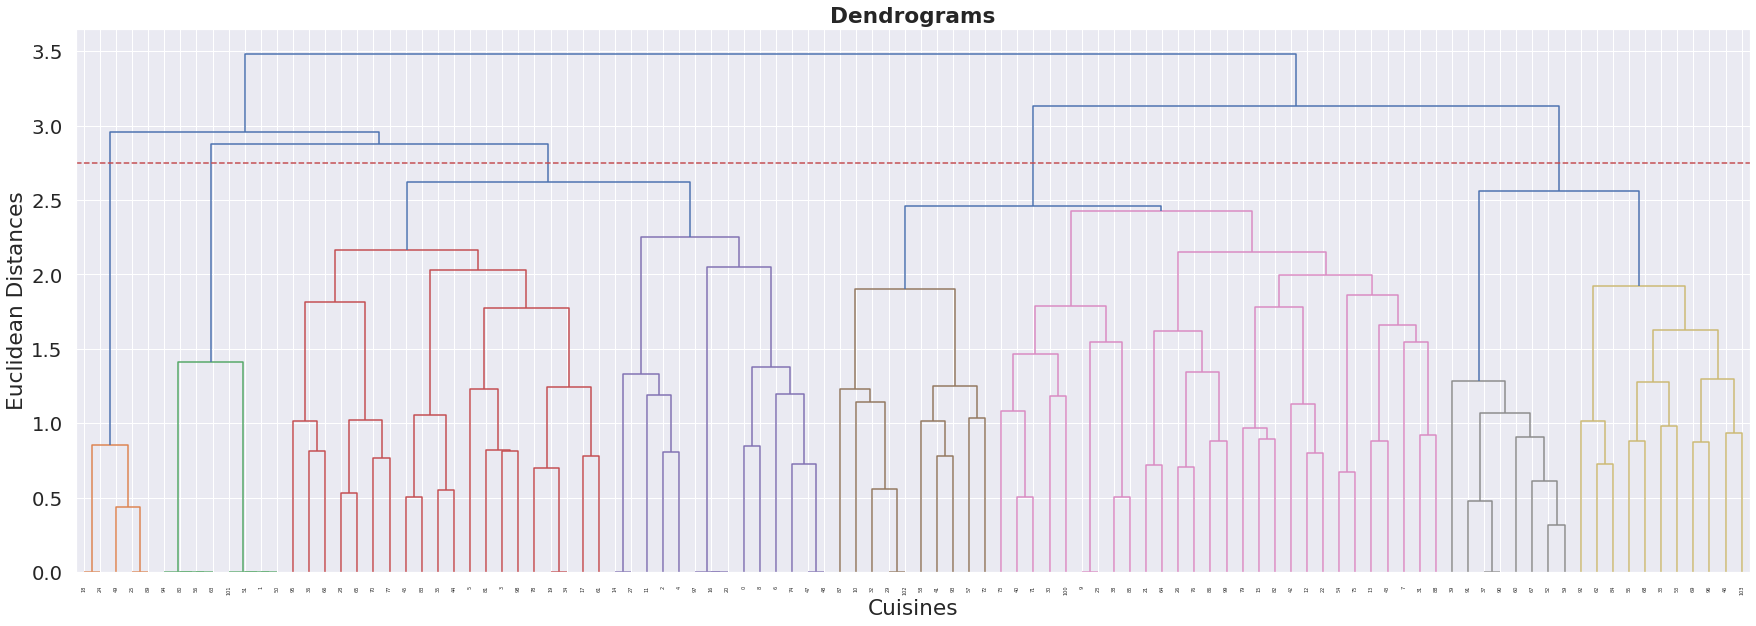

In [52]:
# Hierarchical Clustering for 'Cuisine' feature
plt.figure(figsize=(30,10))
sns.set(font_scale = 1.8)
dend = shc.dendrogram(shc.linkage(X, method='ward'))
plt.title('Dendrograms',fontweight = 'bold')
plt.xlabel('Cuisines')
plt.ylabel('Euclidean Distances')
plt.axhline(y=2.75, color='r', linestyle='--')
plt.show()

**Agglomerative Clustering**

In [53]:
# To choose appropriate K value

for k in range(2,20):
  aggh = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')  
  aggh.fit(X)
  y_hc=aggh.fit_predict(X)
  print("For n_clusters =", k, "The average silhouette_score is :", round(silhouette_score(X, y_hc),5))

For n_clusters = 2 The average silhouette_score is : 0.06304
For n_clusters = 3 The average silhouette_score is : 0.07949
For n_clusters = 4 The average silhouette_score is : 0.1068
For n_clusters = 5 The average silhouette_score is : 0.10474
For n_clusters = 6 The average silhouette_score is : 0.11906
For n_clusters = 7 The average silhouette_score is : 0.12565
For n_clusters = 8 The average silhouette_score is : 0.12826
For n_clusters = 9 The average silhouette_score is : 0.13974
For n_clusters = 10 The average silhouette_score is : 0.15252
For n_clusters = 11 The average silhouette_score is : 0.16091
For n_clusters = 12 The average silhouette_score is : 0.17093
For n_clusters = 13 The average silhouette_score is : 0.18888
For n_clusters = 14 The average silhouette_score is : 0.19819
For n_clusters = 15 The average silhouette_score is : 0.20475
For n_clusters = 16 The average silhouette_score is : 0.20966
For n_clusters = 17 The average silhouette_score is : 0.21066
For n_clusters = 

In [54]:
# The silhouette_score is reasonably good for k = 4

In [55]:
# Creating an object for AgglomerativeClustering
aggh = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  

In [56]:
# Fitting the model
aggh.fit(X)

AgglomerativeClustering(n_clusters=4)

In [57]:
# Label Prediction
y_hc=aggh.fit_predict(X)

In [58]:
# Labels
print(y_hc)

[0 0 0 0 0 0 0 2 0 2 2 0 2 2 0 2 0 0 3 0 0 2 2 2 3 3 2 0 0 2 2 2 2 1 0 0 0
 1 2 1 2 2 2 2 0 0 1 0 0 3 0 0 1 1 2 1 0 2 2 1 1 0 1 0 2 0 0 1 1 1 0 2 2 2
 0 2 2 0 0 2 0 0 2 0 1 2 2 2 2 3 1 1 1 2 0 0 1 0 0 2 2 0 2 1]
